We have tWo group Participants one is DatasetIII and another is DataSet II . Each group has participant have given some trials and sessons are recoreded. Main Process steps are covered as below.

# **Dataset III - ForGroup Expriment**

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [ ]:
# Specify the path to the directory containing the data files
data_path = '/content/drive/MyDrive/CE888/dataset_III/'

# Get a list of all the data files in the directory
file_list_III = glob.glob(data_path + '*.csv')

# Initialize an empty dataframe to store the mean values
result_df_III = pd.DataFrame()

# Initialize a list to store non-numeric Participant names
non_numeric_participants = []

# Ignore the DtypeWarnings and FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# List of columns to be converted to numerical values
num_cols = ['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z',
            'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z',
            'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
            'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
            'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)',
            'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
            'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)',
            'Gaze point right Y (MCSnorm)', 'Pupil diameter left', 'Pupil diameter right']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Iterate over each file
for file in file_list_III:
    try:
        # Read the CSV file into a dataframe
        df_III = pd.read_csv(file)

        # Convert the specified columns to numeric values
        df_III[num_cols] = df_III[num_cols].apply(pd.to_numeric, errors='coerce')

        # Apply forward fill for specific columns
        cols_to_fill = ['Pupil diameter left', 'Pupil diameter right', 'Fixation point X', 'Fixation point Y']
        df_III[cols_to_fill] = df_III[cols_to_fill].ffill()

        # Check if 'Participant name' has non-numeric values
        non_numeric_participant_mask = df_III['Participant name'].apply(lambda x: not x.isnumeric())
        non_numeric_participants.extend(df_III.loc[non_numeric_participant_mask, 'Participant name'])

        # Calculate the mean of the numeric columns
        numeric_mean = df_III.select_dtypes(include='number').mean()

        # Add the "Participant name" column to the mean values
        participant_name = df_III['Participant name'].iloc[0]
        numeric_mean['Participant name'] = participant_name

        # Append the mean values to the result dataframe
        result_df_III = result_df_III.append(numeric_mean, ignore_index=True)

    except Exception as e:
        print(f"Error processing file: {file}. Error: {e}")

result_df_III.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant name
0,6814.5,5.397491e+07,5.426480e+08,83579.0,1080.0,1920.0,5.398770e+08,1070.355771,253.597742,1034.763373,...,0.0,897.0,649.0,166.684796,300.552981,1068.048486,240.014733,-803.107280,410.467433,Participant0001
1,16142.5,4.366363e+07,6.342457e+08,73900.0,1080.0,1920.0,6.320927e+08,965.955342,306.260339,928.073536,...,0.0,897.0,649.0,151.752562,219.195237,963.202383,293.415570,-351.312500,694.812500,Participant0001
2,24013.0,3.436799e+07,7.440895e+08,64593.0,1080.0,1920.0,7.419249e+08,945.398773,320.944357,908.148571,...,0.0,897.0,649.0,134.797312,201.432668,939.338274,313.883225,-402.000000,843.857143,Participant0001
3,34343.5,5.468897e+07,8.704348e+08,103283.0,1080.0,1920.0,8.677433e+08,956.205589,382.697346,916.483356,...,0.0,897.0,649.0,142.507026,284.439798,953.806275,374.187836,-242.268966,857.193103,Participant0001
4,45185.5,3.909279e+07,9.997173e+08,72090.0,1080.0,1920.0,9.973218e+08,980.634064,326.117525,940.676424,...,0.0,897.0,649.0,154.653774,189.110026,990.559829,310.639769,-150.313433,896.373134,Participant0001


In [ ]:
# Load the file containing the empathy scores with the correct encoding
empathy_scores = pd.read_csv('/content/drive/MyDrive/CE888/Questionnaire_DataSet/Questionnaire_datasetIA.csv', encoding='latin1')
empathy_scores.head()

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,...,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,...,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,...,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2,3,4,3,...,2,3,4,4,2,4,2,114,96,8 minutes 39 seconds
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3,3,4,4,...,1,4,2,1,4,4,4,138,106,7 minutes 27 seconds


In [ ]:
# Create a mapping between 'Participant name' and 'Participant nr'
participant_mapping = {f'Participant{i+1:04d}': i+1 for i in range(len(empathy_scores))}

# Apply the mapping to convert 'Participant name' in result_df_III to numeric values
result_df_III['Participant nr'] = result_df_III['Participant name'].map(participant_mapping)

# Merge only the 'Participant nr' and 'Total Score original' columns from empathy_scores into result_df_III
result_df_III = result_df_III.merge(empathy_scores[['Participant nr', 'Total Score extended']], on='Participant nr', how='left')
result_df_III.drop(columns=['Participant name'], inplace=True)
result_df_III.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant nr,Total Score extended
0,6814.5,5.397491e+07,5.426480e+08,83579.0,1080.0,1920.0,5.398770e+08,1070.355771,253.597742,1034.763373,...,897.0,649.0,166.684796,300.552981,1068.048486,240.014733,-803.107280,410.467433,1,134
1,16142.5,4.366363e+07,6.342457e+08,73900.0,1080.0,1920.0,6.320927e+08,965.955342,306.260339,928.073536,...,897.0,649.0,151.752562,219.195237,963.202383,293.415570,-351.312500,694.812500,1,134
2,24013.0,3.436799e+07,7.440895e+08,64593.0,1080.0,1920.0,7.419249e+08,945.398773,320.944357,908.148571,...,897.0,649.0,134.797312,201.432668,939.338274,313.883225,-402.000000,843.857143,1,134
3,34343.5,5.468897e+07,8.704348e+08,103283.0,1080.0,1920.0,8.677433e+08,956.205589,382.697346,916.483356,...,897.0,649.0,142.507026,284.439798,953.806275,374.187836,-242.268966,857.193103,1,134
4,45185.5,3.909279e+07,9.997173e+08,72090.0,1080.0,1920.0,9.973218e+08,980.634064,326.117525,940.676424,...,897.0,649.0,154.653774,189.110026,990.559829,310.639769,-150.313433,896.373134,1,134


In [ ]:
# Define your features and target variable
X = result_df_III.drop(columns=['Total Score extended'])
y = result_df_III['Total Score extended']
groups = result_df_III['Participant nr']  # Use 'Participant nr' as the grouping variable

n_splits = 30  # Number of Participant groups
gkf = GroupKFold(n_splits=n_splits)

In [ ]:
mse_scores = []
r2_scores = []
rt_MSE_scores = []
medae_scores = []

In [ ]:
for fold, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform imputation to handle missing values
    imputer = SimpleImputer(strategy='mean')  # You can choose a suitable imputation strategy
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Initialize and train your model (RandomForestRegressor in this case)
    model = RandomForestRegressor()
    model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_imputed)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rt_MSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)
    rt_MSE_scores.append(rt_MSE)
    medae_scores.append(medae)

    # Printing individual fold results
    print(f"Fold {fold + 1}:")
    for idx, (original, predicted) in enumerate(zip(y_test, y_pred)):
        participant_nr = groups.iloc[test_index[idx]]
        print(f"  Participant nr: {participant_nr}, Original Empathy Score: {original:.2f}, Predicted Empathy Score: {predicted:.2f}")

Fold 1:
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.56
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.57
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.82
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 117.46
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.56
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 121.03
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.42
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.40
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.56
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.82
  Participant nr: 1, Original Empathy Score: 134.00, Predicted Empathy Score: 120.57
  Participant nr: 1, Original Empathy Score: 134.00, Pred

In [ ]:
# Calculate average of evaluation metrics across all folds
avg_r2 = np.mean(r2_scores)
avg_rt = np.mean(rt_MSE_scores)
avg_medae = np.mean(medae_scores)
avg_mse_scores = np.mean(mse_scores)


print(f"Average Rt mean sqr error: {avg_r2}")
print(f"Average Rt mean sqr error: {avg_rt}")
print(f"Average Median Abs error: {avg_medae}")
print(f"Average Mean Squared Error: {avg_mse_scores}")

Average Rt mean sqr error: -7.115787118055558
Average Rt mean sqr error: 12.704155062637097
Average Median Abs error: 12.058166666666667
Average Mean Squared Error: 230.12226561111112


In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

# ... (your existing code above)

# Create an empty dictionary to store the participant-wise results
participant_data = {}

for fold, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



    # Store actual and predicted scores for each participant in the dictionary
    for idx, (original, predicted) in enumerate(zip(y_test, y_pred)):
        participant_nr = groups.iloc[test_index[idx]]
        if participant_nr not in participant_data:
            participant_data[participant_nr] = {'Original': [], 'Predicted': []}
        participant_data[participant_nr]['Original'].append(original)
        participant_data[participant_nr]['Predicted'].append(predicted)

# Create an empty dataframe to store the participant-wise results
participant_results = pd.DataFrame(columns=['Participant', 'Original_Empathy', 'Predicted_Empathy'])

for participant_nr, scores in participant_data.items():
    original_scores = scores['Original']
    predicted_scores = scores['Predicted']

    # Only add the first occurrence of each participant to the dataframe
    participant_results = participant_results.append({'Participant': participant_nr,
                                                      'Original_Empathy': original_scores[0],
                                                      'Predicted_Empathy': predicted_scores[0]},
                                                     ignore_index=True)

# Display the unique participant-wise results dataframe
print(participant_results)


    Participant  Original_Empathy  Predicted_Empathy
0           1.0             134.0             135.82
1           3.0             116.0             135.82
2           5.0             138.0             135.82
3           7.0             127.0             135.82
4           9.0             114.0             135.82
5          53.0             104.0             135.82
6          27.0             113.0             135.82
7          11.0             128.0             135.82
8          13.0             105.0             135.82
9          15.0             122.0             135.82
10         17.0             139.0             135.82
11         19.0             137.0             135.82
12         21.0             117.0             135.82
13         23.0             128.0             135.82
14         25.0             128.0             135.82
15         57.0             139.0             135.82
16         51.0             100.0             135.82
17         55.0             117.0             

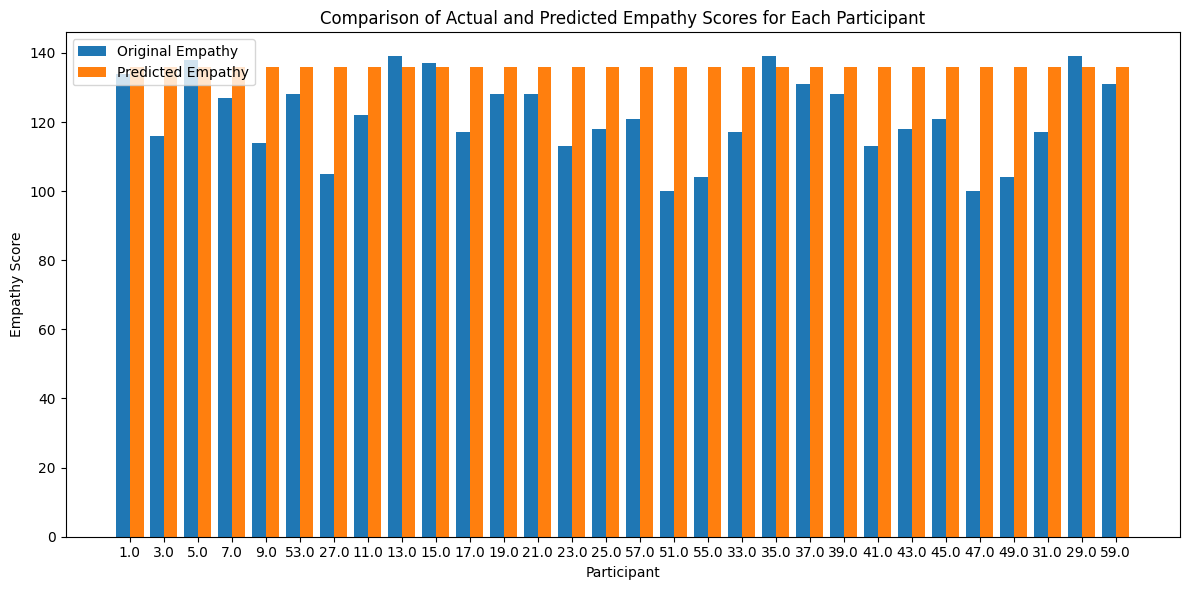

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique participant numbers
unique_participants = participant_results['Participant'].unique()

# Calculate the number of unique participants
num_participants = len(unique_participants)

# Set the positions and width for the bars
positions = np.arange(num_participants)
width = 0.4

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(positions - width/2, participant_results.groupby('Participant')['Original_Empathy'].mean(), width, label='Original Empathy')
plt.bar(positions + width/2, participant_results.groupby('Participant')['Predicted_Empathy'].mean(), width, label='Predicted Empathy')

# Add labels and title
plt.xlabel('Participant')
plt.ylabel('Empathy Score')
plt.title('Comparison of Actual and Predicted Empathy Scores for Each Participant')
plt.xticks(positions, unique_participants)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate average of evaluation metrics across all folds
avg_r2_Dataset_III = np.mean(r2_scores)
avg_rt__Dataset_III = np.mean(rt_MSE_scores)
avg_medae__Dataset_III = np.mean(medae_scores)
avg_mse_scores__Dataset_III = np.mean(mse_scores)


print(f"Average Rt mean sqr error: {avg_rt__Dataset_III}")
print(f"Average Median Abs error: {avg_medae__Dataset_III}")
print(f"Average Mean Squared Error: {avg_mse_scores__Dataset_III}")

Average Rt mean sqr error: 11.251706320180038
Average Median Abs error: 10.991666666666667
Average Mean Squared Error: 169.81376880192502


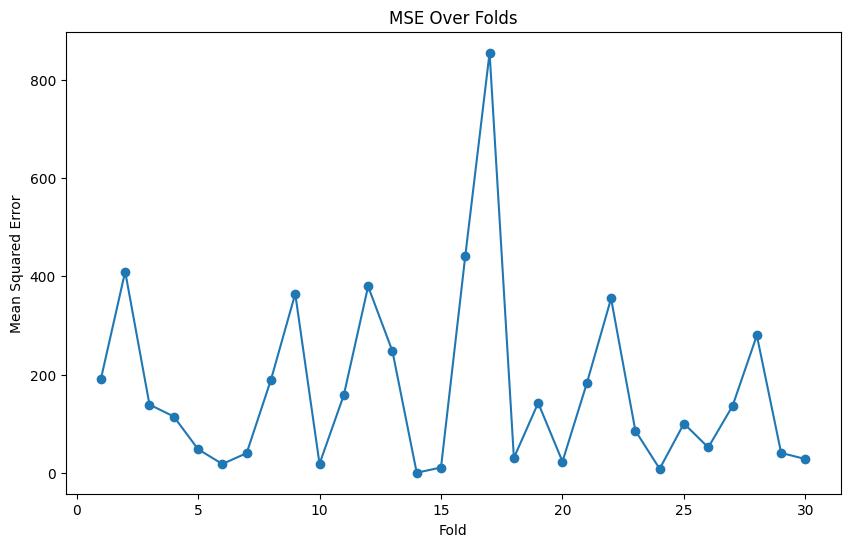

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot (Time Series) - MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), mse_scores, marker='o')
plt.title('MSE Over Folds')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.show()


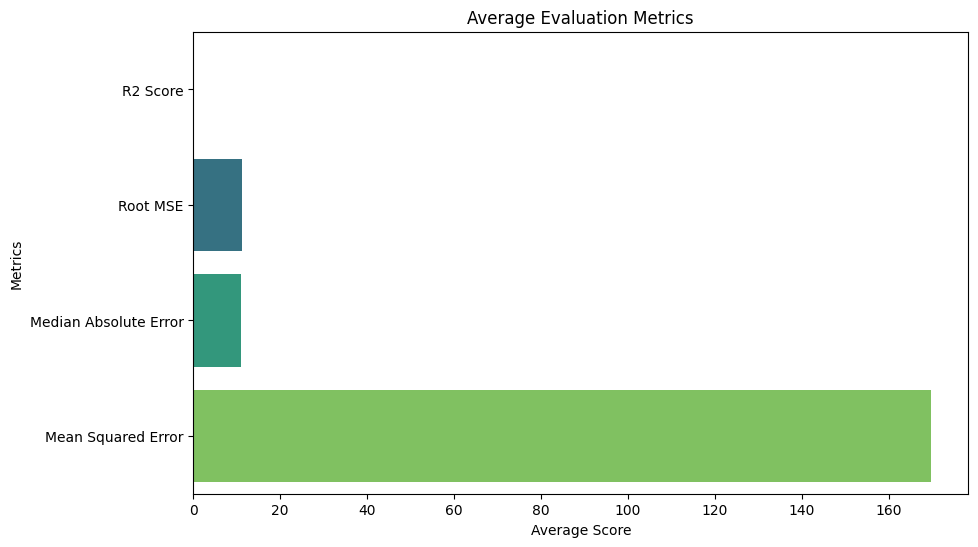

In [ ]:
# Bar Plot - Average Evaluation Metrics
metrics = ['R2 Score', 'Root MSE', 'Median Absolute Error', 'Mean Squared Error']
avg_metrics = [avg_r2, avg_rt, avg_medae, avg_mse_scores]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_metrics, y=metrics, palette='viridis')
plt.title('Average Evaluation Metrics')
plt.xlabel('Average Score')
plt.ylabel('Metrics')
plt.show()

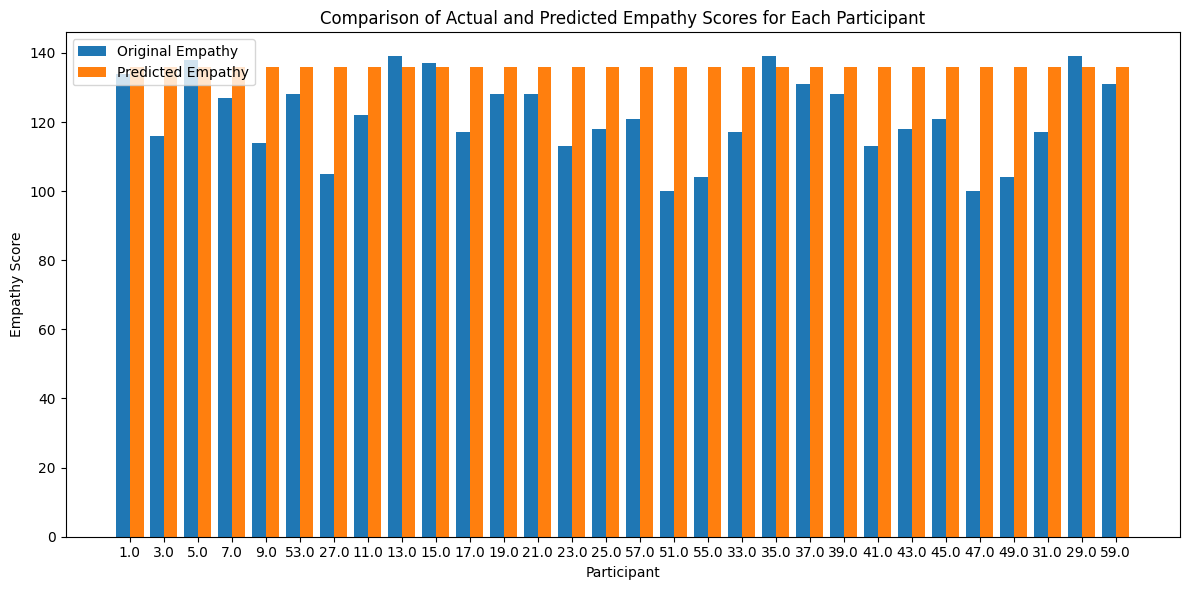

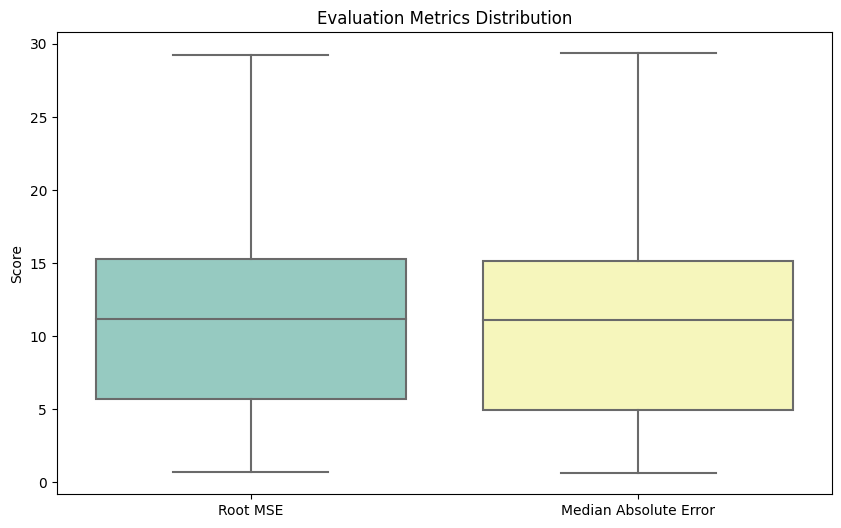

In [ ]:
# Box Plot - Evaluation Metrics Distribution
metrics_df = pd.DataFrame({'Root MSE': rt_MSE_scores, 'Median Absolute Error': medae_scores})
plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df, palette='Set3')
plt.title('Evaluation Metrics Distribution')
plt.ylabel('Score')
plt.show()

**Dataset II - Test Group Expriment**

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

In [ ]:
# Specify the path to the directory containing the data files
data_path = '/content/drive/MyDrive/CE888/dataset_II/'

# Get a list of all the data files in the directory
file_list_II = glob.glob(data_path + '*.csv')

# Initialize an empty dataframe to store the mean values
result_df_II = pd.DataFrame()

# Initialize a list to store non-numeric Participant names
non_numeric_participants = []

# Ignore the DtypeWarnings and FutureWarnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# List of columns to be converted to numerical values
num_cols = ['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z',
            'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z',
            'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
            'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
            'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)',
            'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)',
            'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)',
            'Gaze point right Y (MCSnorm)', 'Pupil diameter left', 'Pupil diameter right']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Iterate over each file
for file in file_list_II:
    try:
        # Read the CSV file into a dataframe
        df_II = pd.read_csv(file)

        # Convert the specified columns to numeric values
        df_II[num_cols] = df_II[num_cols].apply(pd.to_numeric, errors='coerce')

        # Apply forward fill for specific columns
        cols_to_fill = ['Pupil diameter left', 'Pupil diameter right', 'Fixation point X', 'Fixation point Y']
        df_II[cols_to_fill] = df_II[cols_to_fill].ffill()

        # Check if 'Participant name' has non-numeric values
        non_numeric_participant_mask = df_II['Participant name'].apply(lambda x: not x.isnumeric())
        non_numeric_participants.extend(df_II.loc[non_numeric_participant_mask, 'Participant name'])

        # Calculate the mean of the numeric columns
        numeric_mean = df_II.select_dtypes(include='number').mean()

        # Add the "Participant name" column to the mean values
        participant_name = df_II['Participant name'].iloc[0]
        numeric_mean['Participant name'] = participant_name

        # Append the mean values to the result dataframe
        result_df_II = result_df_II.append(numeric_mean, ignore_index=True)

    except Exception as e:
        print(f"Error processing file: {file}. Error: {e}")


In [ ]:
result_df_II.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant name
0,17098.0,1.251867e+07,5.151876e+11,15290.0,1080.0,1920.0,6.816481e+08,961.112397,405.591736,918.158333,...,-228.358974,1674.855769,1257.727564,344.344288,46.444444,956.641026,397.951923,-449.000000,985.000000,Participant0002
1,9736.5,7.793523e+07,5.150520e+11,106276.0,1080.0,1920.0,5.455115e+08,848.186414,349.469758,816.659305,...,-27.556291,752.975304,511.398041,168.958310,304.909879,858.557528,361.661850,-456.954023,739.591954,Participant0002
2,14833.0,1.035229e+07,5.151135e+11,14124.0,1080.0,1920.0,6.076029e+08,902.517576,345.432727,857.855683,...,-165.522286,1387.268571,1024.644571,187.437710,39.836139,907.564534,351.748597,-450.307692,983.230769,Participant0002
3,33169.0,1.182508e+08,5.156202e+11,228445.0,1080.0,1920.0,1.114039e+09,845.293367,385.072714,811.107777,...,-232.304314,1887.399655,1373.252370,145.901685,620.866049,846.370786,393.642371,-473.782222,791.471111,Participant0002
4,17098.0,1.251867e+07,5.151876e+11,15290.0,1080.0,1920.0,6.816481e+08,961.112397,405.591736,918.158333,...,-228.358974,1674.855769,1257.727564,344.344288,46.444444,956.641026,397.951923,-449.000000,985.000000,Participant0002


In [ ]:
# Load the file containing the empathy scores with the correct encoding
empathy_scores = pd.read_csv('/content/drive/MyDrive/CE888/Questionnaire_DataSet/Questionnaire_datasetIA.csv', encoding='latin1')

# Create a mapping between 'Participant name' and 'Participant nr'
participant_mapping = {f'Participant{i+1:04d}': i+1 for i in range(len(empathy_scores))}

# Apply the mapping to convert 'Participant name' in result_df_II to numeric values
result_df_II['Participant nr'] = result_df_II['Participant name'].map(participant_mapping)

# Merge only the 'Participant nr' and 'Total Score original' columns from empathy_scores into result_df_II
result_df_II = result_df_II.merge(empathy_scores[['Participant nr', 'Total Score extended']], on='Participant nr', how='left')
result_df_II.drop(columns=['Participant name'], inplace=True)

In [ ]:
result_df_II.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant nr,Total Score extended
0,17098.0,1.251867e+07,5.151876e+11,15290.0,1080.0,1920.0,6.816481e+08,961.112397,405.591736,918.158333,...,1674.855769,1257.727564,344.344288,46.444444,956.641026,397.951923,-449.000000,985.000000,2,133
1,9736.5,7.793523e+07,5.150520e+11,106276.0,1080.0,1920.0,5.455115e+08,848.186414,349.469758,816.659305,...,752.975304,511.398041,168.958310,304.909879,858.557528,361.661850,-456.954023,739.591954,2,133
2,14833.0,1.035229e+07,5.151135e+11,14124.0,1080.0,1920.0,6.076029e+08,902.517576,345.432727,857.855683,...,1387.268571,1024.644571,187.437710,39.836139,907.564534,351.748597,-450.307692,983.230769,2,133
3,33169.0,1.182508e+08,5.156202e+11,228445.0,1080.0,1920.0,1.114039e+09,845.293367,385.072714,811.107777,...,1887.399655,1373.252370,145.901685,620.866049,846.370786,393.642371,-473.782222,791.471111,2,133
4,17098.0,1.251867e+07,5.151876e+11,15290.0,1080.0,1920.0,6.816481e+08,961.112397,405.591736,918.158333,...,1674.855769,1257.727564,344.344288,46.444444,956.641026,397.951923,-449.000000,985.000000,2,133


In [ ]:
# Define your features and target variable
X = result_df_II.drop(columns=['Total Score extended'])
y = result_df_II['Total Score extended']
groups = result_df_II['Participant nr']  # Use 'Participant nr' as the grouping variable

n_splits = 30  # Number of Participant groups
gkf = GroupKFold(n_splits=n_splits)

mse_scores = []
r2_scores = []
rt_MSE_scores = []
medae_scores = []

In [ ]:
for fold, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform imputation to handle missing values
    imputer = SimpleImputer(strategy='mean')  # You can choose a suitable imputation strategy
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Initialize and train your model (RandomForestRegressor in this case)
    model = RandomForestRegressor()
    model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = model.predict(X_test_imputed)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rt_MSE = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)
    rt_MSE_scores.append(rt_MSE)
    medae_scores.append(medae)

    # Printing individual fold results
    print(f"Fold {fold + 1}:")
    for idx, (original, predicted) in enumerate(zip(y_test, y_pred)):
        participant_nr = groups.iloc[test_index[idx]]
        print(f"  Participant nr: {participant_nr}, Original Empathy Score: {original:.2f}, Predicted Empathy Score: {predicted:.2f}")

Fold 1:
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 117.46
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 111.78
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 116.69
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 119.75
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 117.46
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 111.78
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 116.69
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 119.75
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 117.46
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 116.69
  Participant nr: 2, Original Empathy Score: 133.00, Predicted Empathy Score: 111.78
  Participant nr: 2, Original Empathy Score: 133.00, Pred

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

# ... (your existing code above)

# Create an empty dictionary to store the participant-wise results
participant_data = {}

for fold, (train_index, test_index) in enumerate(gkf.split(X, y, groups=groups)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



    # Store actual and predicted scores for each participant in the dictionary
    for idx, (original, predicted) in enumerate(zip(y_test, y_pred)):
        participant_nr = groups.iloc[test_index[idx]]
        if participant_nr not in participant_data:
            participant_data[participant_nr] = {'Original': [], 'Predicted': []}
        participant_data[participant_nr]['Original'].append(original)
        participant_data[participant_nr]['Predicted'].append(predicted)

# Create an empty dataframe to store the participant-wise results
participant_results = pd.DataFrame(columns=['Participant', 'Original_Empathy', 'Predicted_Empathy'])

for participant_nr, scores in participant_data.items():
    original_scores = scores['Original']
    predicted_scores = scores['Predicted']

    # Only add the first occurrence of each participant to the dataframe
    participant_results = participant_results.append({'Participant': participant_nr,
                                                      'Original_Empathy': original_scores[0],
                                                      'Predicted_Empathy': predicted_scores[0]},
                                                     ignore_index=True)

# Display the unique participant-wise results dataframe
print(participant_results)


    Participant  Original_Empathy  Predicted_Empathy
0           2.0             133.0             131.26
1           4.0             114.0             131.26
2           6.0             121.0             131.26
3          29.0             118.0             131.26
4          60.0             123.0             132.16
5           1.0             134.0             131.26
6          59.0             131.0             132.16
7           8.0             116.0             131.26
8          10.0             117.0             131.26
9          12.0             124.0             131.26
10         14.0             124.0             131.26
11         16.0             120.0             131.26
12         18.0             138.0             131.26
13         20.0             121.0             131.26
14         22.0             115.0             131.26
15         24.0             143.0             131.26
16         28.0             137.0             131.26
17         30.0             129.0             

In [ ]:
# Calculate average of evaluation metrics across all folds
avg_r2_II = np.mean(r2_scores)
avg_rt_II = np.mean(rt_MSE_scores)
avg_medae_II = np.mean(medae_scores)
avg_mse_scores_II = np.mean(mse_scores)


print(f"Average Rt mean sqr error for Datset II : {avg_r2}")
print(f"Average Rt mean sqr error for Datset II : {avg_rt}")
print(f"Average Median Abs error for Datset II : {avg_medae}")
print(f"Average Mean Squared Error for Datset II : {avg_mse_scores}")

Average Rt mean sqr error for Datset II : -7.115787118055558
Average Rt mean sqr error for Datset II : 12.704155062637097
Average Median Abs error for Datset II : 12.058166666666667
Average Mean Squared Error for Datset II : 230.12226561111112


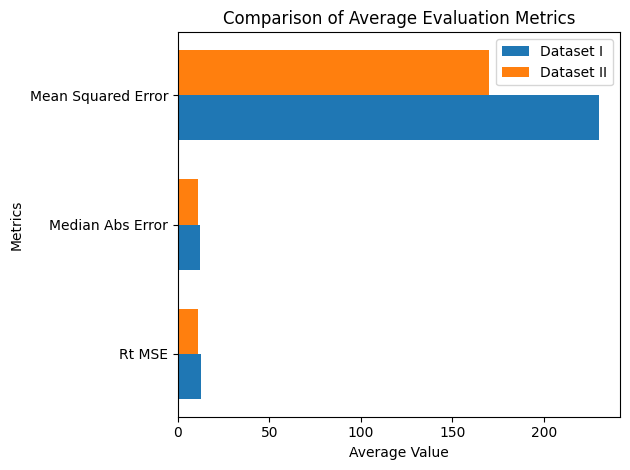

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metric labels
metrics = ['Rt MSE', 'Median Abs Error', 'Mean Squared Error']

# Average values for Dataset II
avg_values_dataset_II = [12.704155062637097, 12.058166666666667, 230.12226561111112]

# Average values for Dataset III
avg_values_dataset_III = [11.251706320180038, 10.991666666666667, 169.81376880192502]

# Set positions for the bars
y = np.arange(len(metrics))

# Height of each bar
bar_height = 0.35

# Create the grouped bar plots
fig, ax = plt.subplots()
rects1 = ax.barh(y - bar_height/2, avg_values_dataset_II, bar_height, label='Dataset I')
rects2 = ax.barh(y + bar_height/2, avg_values_dataset_III, bar_height, label='Dataset II')

# Add labels, title, and legend
ax.set_xlabel('Average Value')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Average Evaluation Metrics')
ax.set_yticks(y)
ax.set_yticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


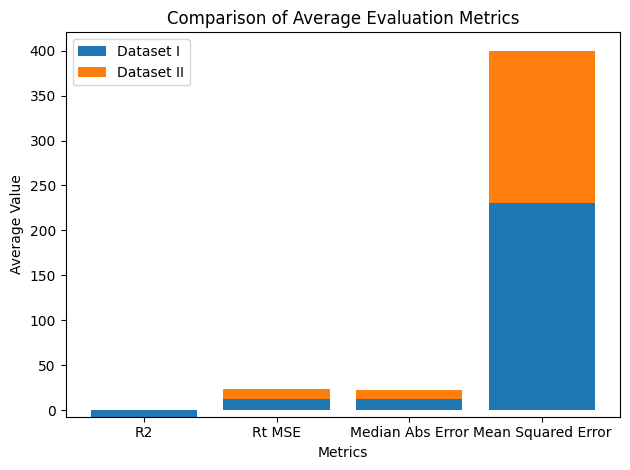

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metric labels
metrics = ['R2', 'Rt MSE', 'Median Abs Error', 'Mean Squared Error']

# Average values for Dataset I
avg_values_dataset_I = [-7.115787118055558, 12.704155062637097, 12.058166666666667, 230.12226561111112]

# Average values for Dataset II
avg_values_dataset_II = [0.0, 11.251706320180038, 10.991666666666667, 169.81376880192502]

# Set positions for the bars
x = np.arange(len(metrics))

# Create the stacked bar plots
plt.bar(x, avg_values_dataset_I, label='Dataset I')
plt.bar(x, avg_values_dataset_II, bottom=avg_values_dataset_I, label='Dataset II')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.title('Comparison of Average Evaluation Metrics')
plt.xticks(x, metrics)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


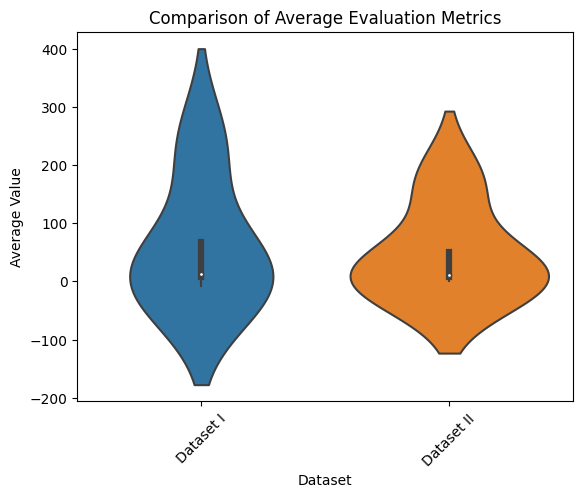

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary for the datasets
data = {
    'Dataset I': [-7.115787118055558, 12.704155062637097, 12.058166666666667, 230.12226561111112],
    'Dataset II': [0.0, 11.251706320180038, 10.991666666666667, 169.81376880192502]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create a violin plot
sns.violinplot(data=df)
plt.xlabel('Dataset')
plt.ylabel('Average Value')
plt.title('Comparison of Average Evaluation Metrics')
plt.xticks(rotation=45)
plt.show()


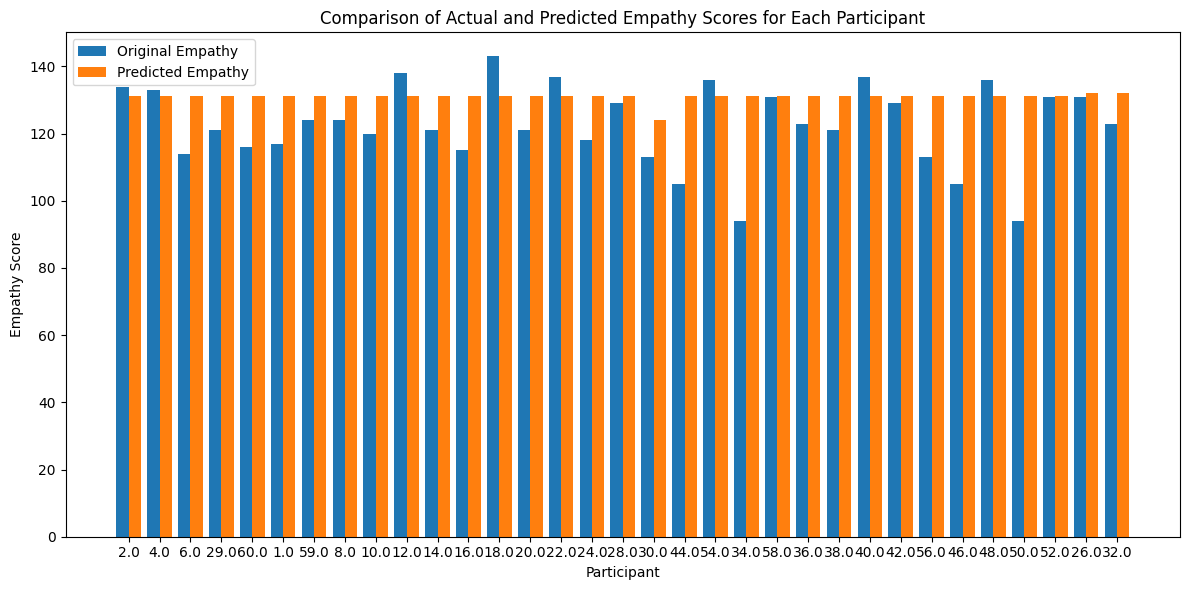

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique participant numbers
unique_participants = participant_results['Participant'].unique()

# Calculate the number of unique participants
num_participants = len(unique_participants)

# Set the positions and width for the bars
positions = np.arange(num_participants)
width = 0.4

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(positions - width/2, participant_results.groupby('Participant')['Original_Empathy'].mean(), width, label='Original Empathy')
plt.bar(positions + width/2, participant_results.groupby('Participant')['Predicted_Empathy'].mean(), width, label='Predicted Empathy')

# Add labels and title
plt.xlabel('Participant')
plt.ylabel('Empathy Score')
plt.title('Comparison of Actual and Predicted Empathy Scores for Each Participant')
plt.xticks(positions, unique_participants)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate average of evaluation metrics across all folds
avg_r2_Dataset_III = np.mean(r2_scores)
avg_rt__Dataset_III = np.mean(rt_MSE_scores)
avg_medae__Dataset_III = np.mean(medae_scores)
avg_mse_scores__Dataset_III = np.mean(mse_scores)


print(f"Average Rt mean sqr error: {avg_rt__Dataset_III}")
print(f"Average Median Abs error: {avg_medae__Dataset_III}")
print(f"Average Mean Squared Error: {avg_mse_scores__Dataset_III}")

Average Rt mean sqr error: 12.71590213384834
Average Median Abs error: 12.174166666666666
Average Mean Squared Error: 233.3423036111111


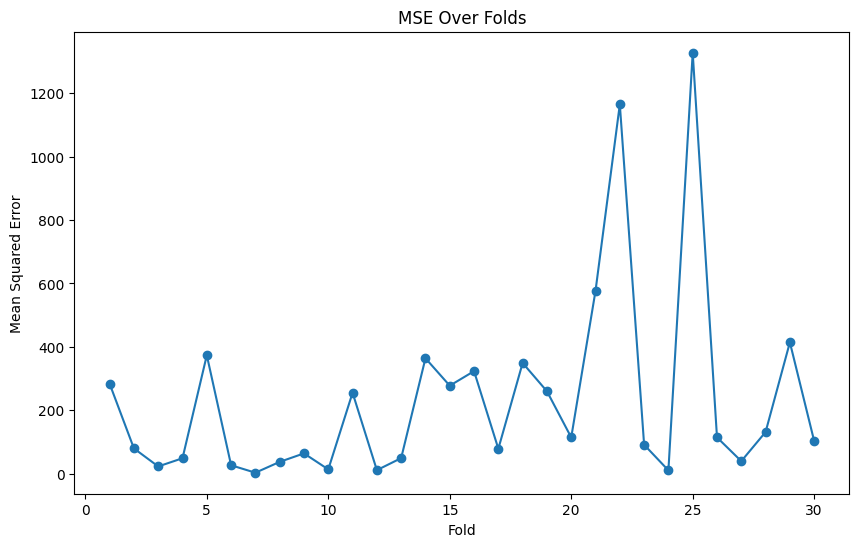

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot (Time Series) - MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), mse_scores, marker='o')
plt.title('MSE Over Folds')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.show()


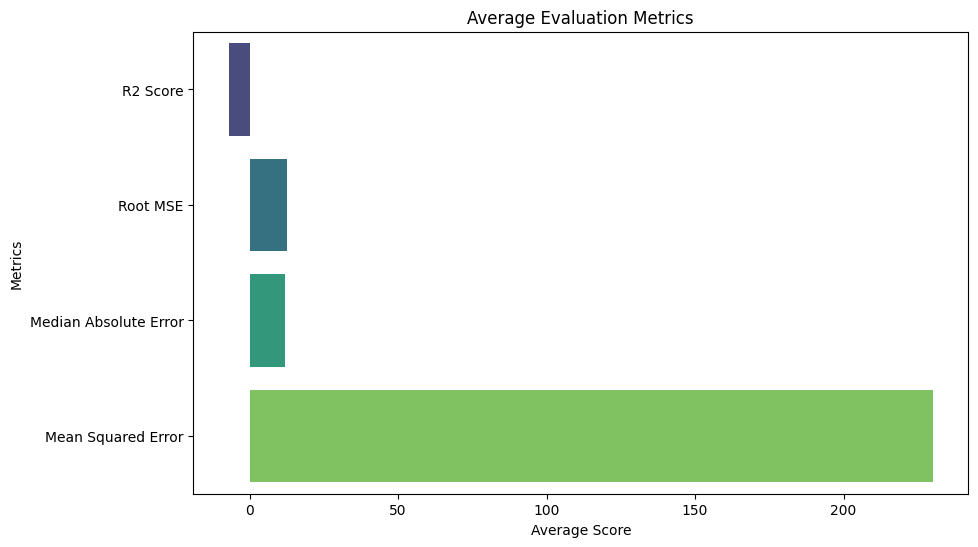

In [ ]:
# Bar Plot - Average Evaluation Metrics
metrics = ['R2 Score', 'Root MSE', 'Median Absolute Error', 'Mean Squared Error']
avg_metrics = [avg_r2, avg_rt, avg_medae, avg_mse_scores]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_metrics, y=metrics, palette='viridis')
plt.title('Average Evaluation Metrics')
plt.xlabel('Average Score')
plt.ylabel('Metrics')
plt.show()

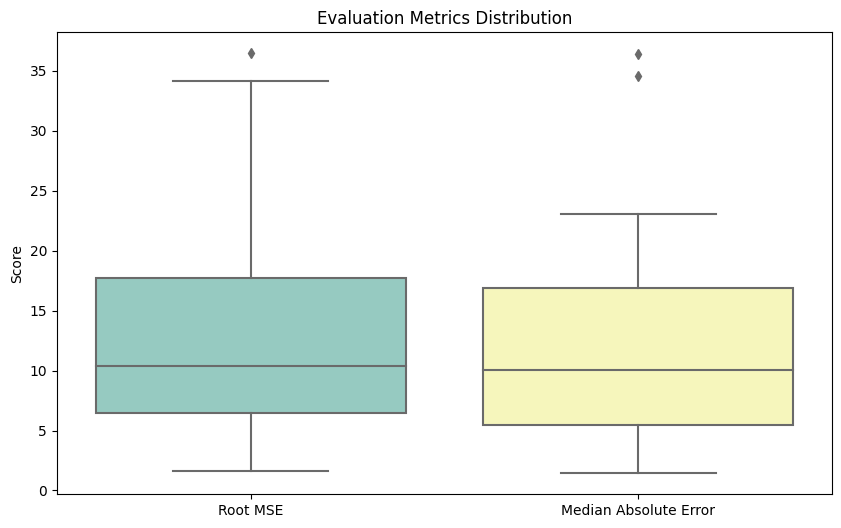

In [ ]:
# Box Plot - Evaluation Metrics Distribution
metrics_df = pd.DataFrame({'Root MSE': rt_MSE_scores, 'Median Absolute Error': medae_scores})
plt.figure(figsize=(10, 6))
sns.boxplot(data=metrics_df, palette='Set3')
plt.title('Evaluation Metrics Distribution')
plt.ylabel('Score')
plt.show()
